# t-SNE

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
oswald_fea = '/home/ys587/__Data/__whistle/__whislte_30_species/__dataset/20210216_augment_all_three'

In [3]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)

## STAR2000 over species: original

In [20]:
fea_file = 'oswald_STAR2000_orig.npz'
fea_temp = np.load(os.path.join(oswald_fea, fea_file))
features = fea_temp['feas_orig']
labels = fea_temp['labels_orig']
del fea_temp

fea_dim = features.shape
features = np.reshape(features, (-1, fea_dim[1]*fea_dim[2]))

### PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=1000)
features_pca = pca.fit_transform(features)

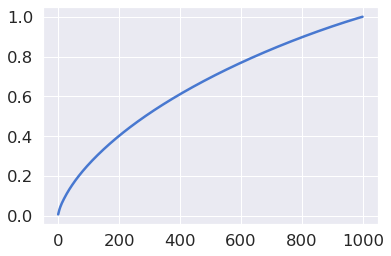

In [23]:
variance_cumsum  = np.cumsum(pca.explained_variance_)
plt.plot(variance_cumsum/variance_cumsum[-1])

###  t-SNE

In [8]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2, perplexity=30, n_jobs=os.cpu_count())
# features_tsne = tsne.fit_transform(features)
features_tsne = tsne.fit_transform(features_pca)

/home/ys587/miniconda3/envs/whistle_classifier/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ys587/miniconda3/envs/whistle_classifier/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(-3.056425866507249,
 3.0927597492159165,
 -3.2280887525468684,
 2.841832124601617)

posx and posy should be finite values
posx and posy should be finite values


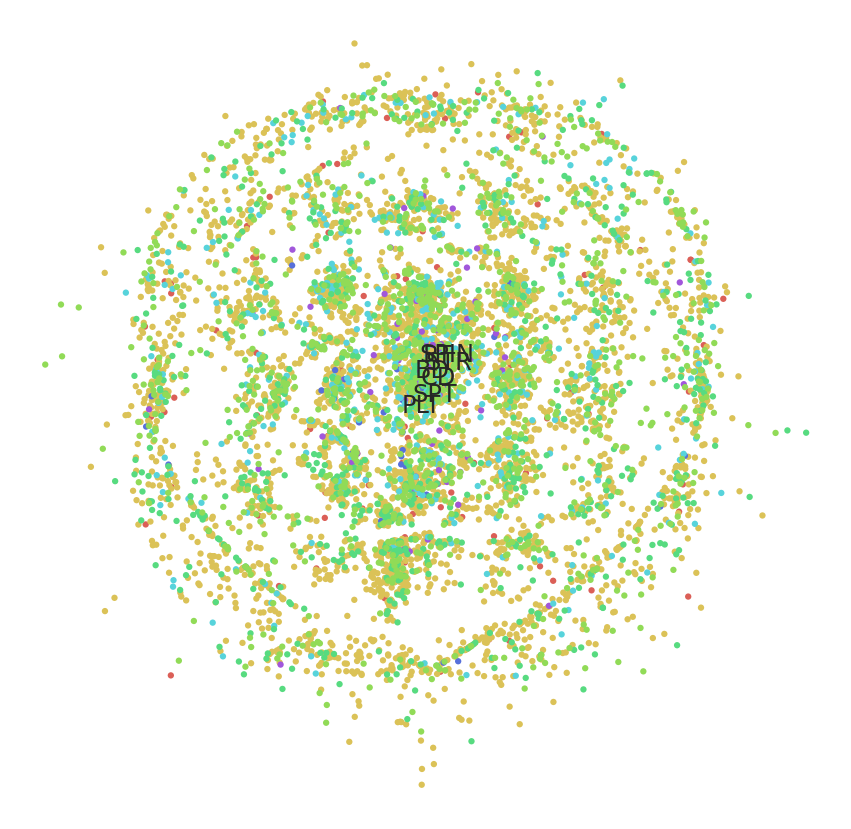

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

label_text = list(species_dict.keys())
num_classes = 8
# colors = np.array(labels)
# colors = np.array(list(species_dict.values()))
colors = np.zeros(labels.shape[0])
for ii in range(labels.shape[0]):
    colors[ii] = species_dict[labels[ii]]

palette = np.array(sns.color_palette("hls", num_classes))
c=palette[colors.astype(np.int)]

f = plt.figure(figsize=(15, 15))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(features_tsne[:,0], features_tsne[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])

# label_text = ['Non-cough', 'Cough']
# label_text  = list(species_dict.keys())
for i in range(num_classes):
    # Position of each label at median of data points.

    xtext, ytext = np.median(features_tsne[colors == i, :], axis=0)
    txt = ax.text(xtext, ytext, label_text[i], fontsize=24)

plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

## STAR2000 over species: augmentation

In [12]:
fea_file = 'oswald_STAR2000_aug.npz'
fea_temp = np.load(os.path.join(oswald_fea, fea_file))
features = fea_temp['feas_aug']
labels = fea_temp['labels_aug']
del fea_temp

fea_dim = features.shape
features = np.reshape(features, (-1, fea_dim[1]*fea_dim[2]))

### PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1000)
features_pca = pca.fit_transform(features)

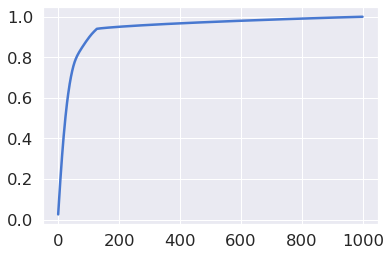

In [15]:
variance_cumsum  = np.cumsum(pca.explained_variance_)
plt.plot(variance_cumsum/variance_cumsum[-1])

###  t-SNE

In [16]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2, perplexity=30, n_jobs=os.cpu_count())
# features_tsne = tsne.fit_transform(features)
features_tsne = tsne.fit_transform(features_pca)

/home/ys587/miniconda3/envs/whistle_classifier/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ys587/miniconda3/envs/whistle_classifier/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(-59.44948478891979, 59.85198185013775, -59.48052403056112, 59.58428451326334)

posx and posy should be finite values
posx and posy should be finite values


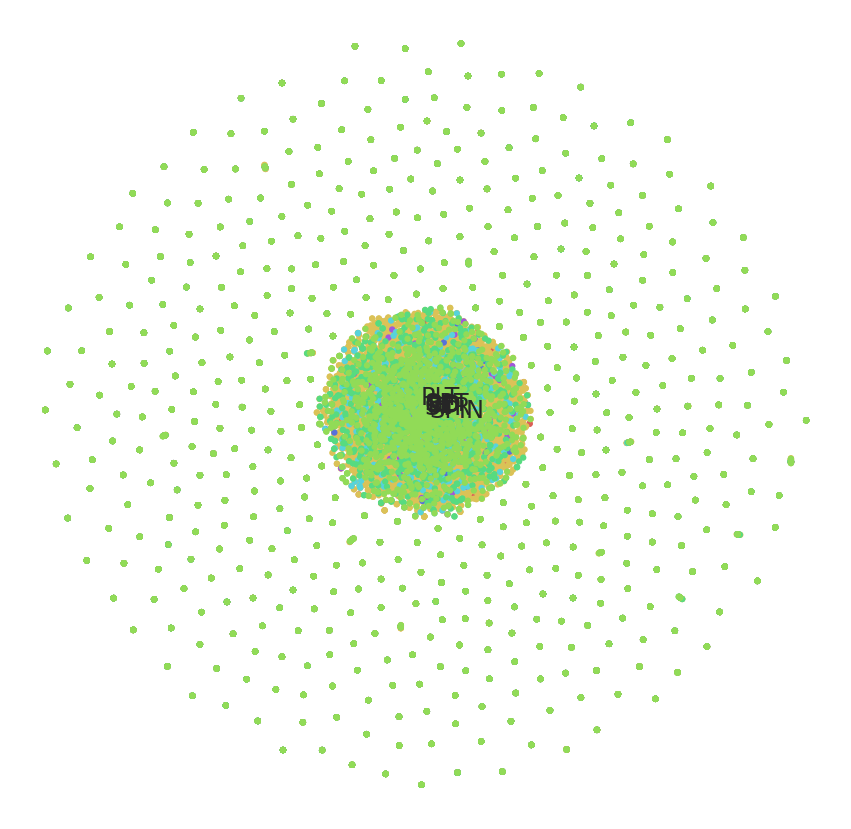

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

label_text = list(species_dict.keys())
num_classes = 8
# colors = np.array(labels)
# colors = np.array(list(species_dict.values()))
colors = np.zeros(labels.shape[0])
for ii in range(labels.shape[0]):
    colors[ii] = species_dict[labels[ii]]

palette = np.array(sns.color_palette("hls", num_classes))
c=palette[colors.astype(np.int)]

f = plt.figure(figsize=(15, 15))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(features_tsne[:,0], features_tsne[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])

# label_text = ['Non-cough', 'Cough']
# label_text  = list(species_dict.keys())
for i in range(num_classes):
    # Position of each label at median of data points.

    xtext, ytext = np.median(features_tsne[colors == i, :], axis=0)
    txt = ax.text(xtext, ytext, label_text[i], fontsize=24)

plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

## Apply trained model for feature extraction

In [26]:
the_best_model = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210222_120930/STAR2000/epoch_10_valloss_0.7816_valacc_0.7521.hdf5'
base_model = load_model(the_best_model)
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128, 1) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 134, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 64, 64)   3136        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 64, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [39]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128, 1) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 134, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 64, 64)   3136        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [35]:
base_model.layers[-2]

In [44]:
features_temp = np.reshape(features, (-1, fea_dim[1], fea_dim[2]))
features_densenet = model.predict(features_temp)

In [46]:
tsne = TSNE(n_components=2, perplexity=30, n_jobs=os.cpu_count())
# features_tsne = tsne.fit_transform(features)
features_densenet_tsne = tsne.fit_transform(features_densenet)

/home/ys587/miniconda3/envs/whistle_classifier/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ys587/miniconda3/envs/whistle_classifier/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(-34.049091793471675, 40.897869534624604, -43.0779529099163, 38.76871857298611)

posx and posy should be finite values
posx and posy should be finite values


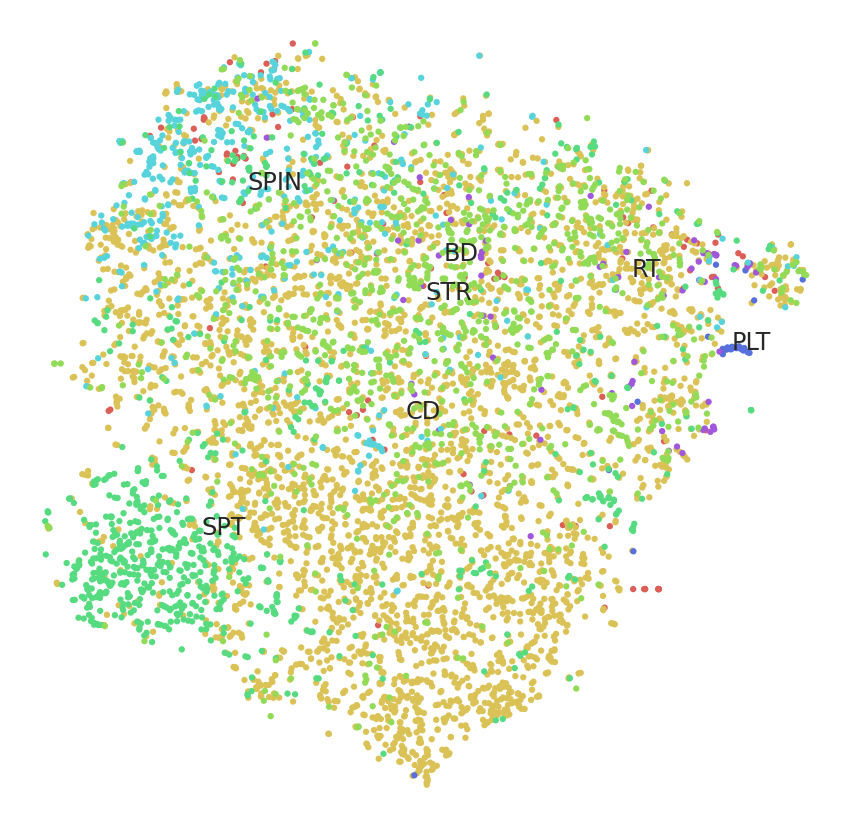

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

label_text = list(species_dict.keys())
num_classes = 8
# colors = np.array(labels)
# colors = np.array(list(species_dict.values()))
colors = np.zeros(labels.shape[0])
for ii in range(labels.shape[0]):
    colors[ii] = species_dict[labels[ii]]

palette = np.array(sns.color_palette("hls", num_classes))
c=palette[colors.astype(np.int)]

f = plt.figure(figsize=(15, 15))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(features_densenet_tsne[:,0], features_densenet_tsne[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])

# label_text = ['Non-cough', 'Cough']
# label_text  = list(species_dict.keys())
for i in range(num_classes):
    # Position of each label at median of data points.

    xtext, ytext = np.median(features_densenet_tsne[colors == i, :], axis=0)
    txt = ax.text(xtext, ytext, label_text[i], fontsize=24)

plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

In [45]:
features_densenet.shape

(6668, 1024)

# Mixed noises

In [10]:
oswald_fea = '/home/ys587/__Data/__whistle/__whislte_30_species/__dataset/20210216_augment_all_three_noise_mixed'